# Summarizing Distributions
In our previous class, we discussed having a sample $(X_1,X_2,...,X_N)$ of size $N$ drawn from the same distribution as a random variable $X$. We alluded to using the sample to learn about features of this distribution $X$.

Econometricians, or anyone that works with data, rarely seek to understand the whole joint distribution underlying their data. Instead, they use various summaries of the distributions. These may include the mean, variance, median, mode, skewness, kurtosis, maximum and minimum, among (infinitely) others. We may sometimes refer to these population quantities as parameters of the underlying distribution. These parameters will be fixed, i.e., they are not random variables.

## Mean and Variance
Two popular ways to summarize the distributions of random variables are the mean, variance, and other "moments" of the data. 

### Moments
Recall that the $k^{th}$ moment of a random variable $X$ is 

- Discrete
$$
\sum_{x\in\Omega}x^kf(x)
$$

- Continuous
$$
\int_{-\infty}^{\infty}x^kf(x)dx
$$

When $k=1$ it is the mean or expectation of $X$. The mean is an example of an "uncentered" moment and the variance an example of a "centered" moment (centered around the mean), but these terms aren't important for this class. All moments are NOT random, they are fixed values.

### Mean or Expectation
- Continuous
$$
E[X] = \int_{-\infty}^{\infty}xf(x)dx
$$

- Discrete
$$
E[X] = \sum_{x\in\Omega}xf(x)
$$

We will sometimes denote the mean of a random variable $X$ as $\mu_X=E[X]$. The mean or expectation is NOT random, it is a fixed scalar value. The mean is a measure of central tendency. It is just the weighted average over the points that the random variable $X$ can take, with more weight given to values with greater density. 

#### Example:
- If $X\sim Bernoulli(p)$ then
$$
E[X] = 1\cdot p + 0\cdot(1-p) = p
$$
- If $X\sim\mathcal{N}(\mu, \sigma^2)$ then $E[X] = \mu$. Students can show that this is true, but in this class its ok if you just know the result.

We plot the mean of the standard normal below.

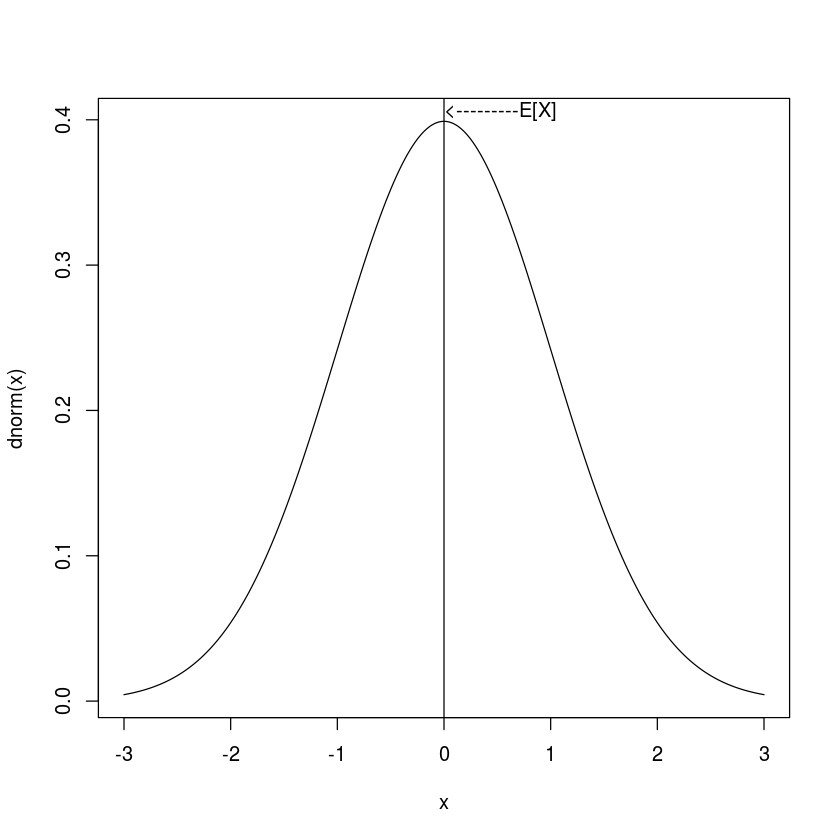

In [1]:
x = seq(-3, 3, length.out=1000)
plot(x, dnorm(x), type='l')
abline(v=0)
text(0, 0.405, "<---------E[X]", adj=c(0, 0.3))

### Centered Moments
The kth centered moment is

- Continuous
$$
E[(X-\mu_X)^k] = \int_{-\infty}^{\infty}(x - \mu_X)^2f(x)dx
$$

### Variance
The variance is the 2nd centered moment.
$$
Var[X] = E[(X-\mu_X)^2] = \int_{-\infty}^{\infty}(x - \mu_X)^2f(x)dx
$$
The variance is a measure of spread or thickness of the distribution. Specifically, its the average squared deviation from the mean. We sometimes denote the variance of random variable $X$ with $\sigma_X^2$. One useful way to write the variance is
$$
Var[X] = E[X^2] - \mu_X^2.
$$

#### Example:
- If $X\sim Bernoulli(p)$, then $\mu_X = p$, from above, so that
$$
Var[X] = E[(X - \mu)^2] = E[X^2] - \mu_X^2 = E[X] - \mu_X^2 = p - p^2 = p(1-p)
$$
- If $X\sim\mathcal{N}(\mu, \sigma^2)$ then $\sigma^2$ is the variance. Again, we won't show this here and you won't be tested on your ability to show this. Just take the result as given.

### Expectations of Functions of Random Variables
Consider a function of a random variable $g(X)$. This too is a random variable and we can consider its expectation.

- Discrete
$$
E[g(X)] = \sum_xg(x)f(x)
$$

- Continous
$$
E[g(X)] = \int_{-\infty}^{\infty}g(x)f(x)dx
$$

- Example: $g(X) = aX + b$ for scalars $a$ and $b$

$$
E[aX + b] = \int_{-\infty}^{\infty}(ax + b)f(x)dx = a\int_{-\infty}^{\infty}xf(x)dx + \int_{-\infty}^{\infty}bf(x)dx
$$
$$
= aE[X] + b\int_{-\infty}^{\infty}f(x)dx = aE[X] + b,
$$
which shows a useful property of expecations.

## Sample Counterparts to the Mean and Variance
In Lesson 2, we showed an empirical counterpart to the population distribution. We saw the empirical cdf and the histogram. We also have empirical or sample counterparts to the population mean and variance. Suppose we have a sample $(X_i)_{i=1}^N$ of draws from some distribution $X$.

Sample mean:
$$
\bar{X}_N = \frac{1}{N}\sum_{i=1}^NX_i
$$

Sample Variance:
$$
\hat{\sigma}^2_N = \frac{1}{N}\sum_{i=1}^N(X_i - \bar{X}_N)^2
$$

(Note: sometimes sample variance is defined with $N-1$ in denominator as a bias correction.) Do you think our sample estimates will converge to our population estimates as the sample size $N$ increases? Below we show the commands in R for computing the sample mean and variance.

In [2]:
sample = c(1, 1, 4, 2, 4, 5, 2, 7)

mean(sample)

[1] 3.25

In [3]:
var(sample)

[1] 4.5

## Estimators
We can think of the sample mean and sample variance as **estimators** for the population mean and variance. An **estimator** is just a rule for using the sample $(X_1,...,X_N)$ to construct an estimate of a parameter. That is, it is a function $f(X_1,...,X_N)$ of the sample and is therefore also a random variable.

- We may refer to what an estimator estimates as the **estimand**. As an example, the population mean is an **estimand** and the sample mean an **estimator**. The **estimand** is often a parameter of the distribution, like the mean or variance.

An estimator is a function of random variables (and is, therefore, also a random variable) that tells us something about the underlying population distribution. For instance, $f(X_1,...,X_N) = 1$ is also an estimator of the sample mean. It is a function (though a trivial one) of the data and it doesn't seem like a good idea, but it is technically an estimator. Likewise,

$$
\frac{1}{N+1}\sum_{i=1}^NX_i
$$

and

$$
\frac{1}{N+1}\sum_{i=1}^N(X_i - \bar{X}_N)^2
$$

can be estimators for the mean and variance (notice that it is $N+1$ rather than $N$ in the denominator). I'm being somewhat playful with the concept, but I just wanted to instill the fact that we can be creative with how we construct estimators (more on this later).

### Properties of Estimators
We will judge the quality of our estimators based on their properties. These include both finite sample and asymptotic (as N grows "large") properties.

We will explore two of these properties in a Monte Carlo exercise of the sample mean. As we've said above, the sample mean is an estimator for the population mean, and it too is a random variable. Thus, we can make success draws of the sample mean (by simulating $K$ different worlds) and estimate its distribution for a given sample size $N$. We can then explore what happens to the distribution as $N$ grows. Consider a sample $(X_i)_{i=1}^N$ generated from the standard normal distribution.

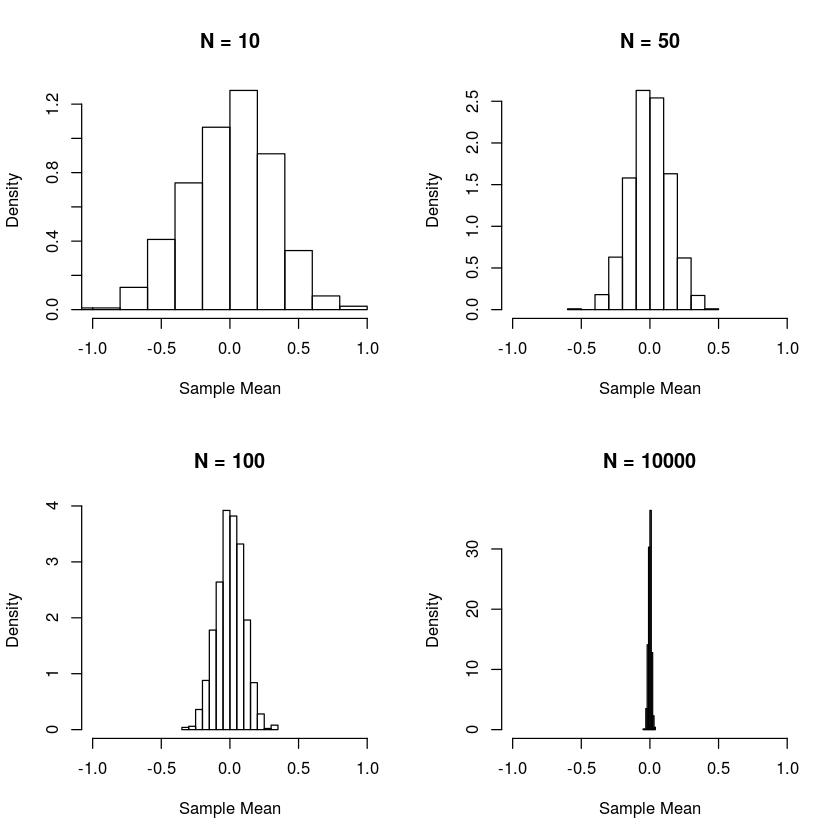

In [4]:
nsim = 1000 # number of simulations
Ns = c(10, 50, 100, 10000) # sample sizes

par(mfrow=c(2, 2))
for (N in Ns) {
    
    means = c()
    
    for (s in 1:nsim) {
        sample = rnorm(N, mean=0, sd=1)
        means = c(means, mean(sample))
    }
    
    hist(means, freq=FALSE, main=paste("N =", N),
    xlab="Sample Mean", xlim=c(-1, 1))
}

There are a couple things you should notice from the plots above:

1. The distributions appear to be centered around 0, regardless of the value of $N$. 
2. The spread or variance of the distributions appears to shrink toward 0 as $N$ grows, and converges to the true mean.

The first property is a finite sample property we call "unbiasedness." The latter is an asymptotic property called "consistency." The sample mean appears to be both unbiased and consistent for the population mean.

#### Unbiasedness
We define unbiasedness mathematically in the following way. An estimator $\hat{\theta}$ (we often use "hats" to refer to estimators) is unbiased for parameter $\theta$ if $E[\hat{\theta}_N] = \theta$. Let's confirm our result for the sample mean.

$$
E[\bar{X}_N] = E\left[\frac{1}{N}\sum_{i=1}^NX_i\right] = \frac{1}{N}\sum_{i=1}^NE[X_i] = \frac{1}{N}NE[X_i] = E[X_i]
$$

where we used the property that for scalars $a$ and $b$, any two random variables $X$ and $Y$, $E[X + Y] = E[X] + E[Y]$ and $E[aX + b] = aE[X] + b$. Thus we can say that the sample mean $\bar{X}_N$ is an unbiased estimator of the population mean.

- You can interpret the unbiasedness of the sample mean as an estimator for $\mu_X$ by realizing it just means "the distribution of the sample mean is centered at $\mu_X$."

#### Consistency
**THIS IS A VERY IMPORTANT CONCEPT!** What about consistency? An estimator $\hat{\theta}_N$ is a consistent estimator of $\theta$ if $\hat{\theta}_N$ **converges in probability** to $\theta$, i.e., if $\forall \epsilon > 0$, $P(|\hat{\theta}_N-\theta|>\epsilon)\to 0$ as $N\to\infty$.

##### Intuition and other Notes
- The probability that $\hat{\theta}_N$ is different from $\theta$ shrinks to zero as $N$ increases. Or, we can (with certainty arbitrarily close to 100%) always find a sample size $N$ such that the difference between $\hat{\theta}_N$ and $\theta$ is *really small.*
- In general, convergence in probability can apply to the case where $\theta$ is also a random variable. Though in this class we will typically consider $\theta$ to be a parameter, like the population mean $\mu$, and $\hat{\theta}_N$ an estimator of this mean, like $\bar{X}_N$.
- An analagous concept for convergence in probability holds for random vectors. And for a random vector $(X,Y)$, if $X_N\overset{p}{\to}X$ and $Y_N\overset{p}{\to}Y$ then $(X_N,Y_N)'\overset{p}{\to}(X,Y)$. That is, marginal convergence in probability implies joint convergence in probability.

Some shorthand for convergence in probability is $\hat{\theta}_N\overset{p}{\to}\theta$. So how do we prove that the sample mean is a consistent estimator of the population mean? We will apply a Theorem, called the Weak Law of Large Numbers (WLLN).

##### Why is consistency so important?
It allows us to go from the sample distribution (think about our data) to the population distribution. So let's assume that we are interested in an elasticity, denoted by $e$. Suppose we know that the elasticity can be written as $e=E[X]$. That is, it is equal to the mean of some random variable $X$ from which we observe realizations in our data. Then the sample mean $\bar{X}_N$ will be informative of our elasticity, and especially so the larger our sample.

##### Theorem (Weak Law of Large Numbers, WLLN)
Suppose that $X_1,...,X_N$ is an iid sequence of random variables with distribution $P$ where $\mu(P)=E[X_i]$ exists, i.e., $E[|X_i|]<\infty$, then

$$
\bar{X}_N = \frac{1}{N}\sum_{i=1}^NX_i\overset{p}{\to}\mu(P),\; \text{ as } N\to\infty.
$$

**Proof.** Let $\epsilon > 0$
$$
P(|\bar{X}_N - \mu_X|>\epsilon) \leq \frac{E[(\bar{X}_N - \mu_X)^2}{\epsilon^2} = \frac{Var[\bar{X}_N]}{\epsilon^2} = \frac{Var[X_i]}{N\epsilon^2} \to 0
$$
where the first inequality is an application of the Markov Inequality.

The proof is relatively simple, but not relevant to know for this class. Interested students can ask the TA. We can apply the theorem directly to our sample mean above to show consistency. The result of the theorem is very important because we can apply this result in many situations. For example, it can be applied to show that 

$$
\frac{1}{N}\sum_{i=1}^NX_i^2\overset{p}{\to} E[X_i^2]
$$

in the case where $X_1,...,X_N$ is iid.

- As an aside, the WLLN also holds for samples $(X_i)_{i=1}^N$ which are *weakly dependent* but still identically distributed. What this means is that we can allow some dependence between observations and the result still holds. An example would be a sample of school data. A common assumption is that observations are dependent within classroom and independent across classrooms.

##### Use of Consistency and Unbiasedness in Practice
Consistency is usually of greater concern than unbiasedness. In fact, when most economists and econometricians use the phrase "the estimator is biased", they usually mean that the estimator is inconsistent. Thus, we can mostly forget about unbiasedness in this course and focus on consistency. And when we refer to the bias of an estimator, unless we specify further, we will mean that the estimator is inconsistent.

##### Another example, the sample variance
What about the sample variance, is it unbiased? Is it consistent? Let us consider consistency. We can rewrite the sample mean as

$$
\frac{1}{N}\sum_{i=1}^N(X_i - \bar{X}_N)^2  = \frac{1}{N}\sum_{i=1}^N(X_i^2 - 2X_i\bar{X}_N + \bar{X}_N^2)
$$
$$
= \frac{1}{N}\sum_{i=1}^NX_i^2 - 2\bar{X}_N\frac{1}{N}\sum_{i=1}^NX_i + \bar{X}_N^2 = \frac{1}{N}\sum_{i=1}^NX_i^2 - \bar{X}_N^2.
$$

Thus, denoting $Z_i=X_i^2$, the sample variance is just a function $g(\bar{Z}_N,\bar{X}_N)$ of two sample means, $\bar{Z}_N = \frac{1}{N}\sum_{i=1}^NX_i^2$ and $\bar{X}_N$ where $g(a,b)=a - b^2$. Given what we know about the limits of sequences of real numbers we should expect that $g(\bar{Z}_N,\bar{X}_N)$ should converge to $g(E[Z_i], E[X_i])=E[X_i^2]-E[X_i]^2=Var[X_i]$ since $g(\cdot)$ is a continuous function of its arguments. And indeed, this is true. We have a theorem that says so. 

##### Continuous Mapping Theorem (for convergence in probability)
Let $\{X_N\}_N$ be a sequence of random vectors on $R^K$ and $X$ another random vector on $R^K$ such that $X_N\overset{p}{\to}X$. If $g:R^K\to R^d$ is continuous at each point of a set $C$ such that $P(X\in C)=1$ then $g(X_N)\overset{p}{\to}g(X)$.

- The result is as you'd expect: continuous functions of converging sequences converge to the function of what the sequences converge to.

Again, we will not prove this result in class, but we will use the theorem, usually with the WLLN to establish consistency for many estimators. We can apply it directly above for the sample variance to achieve the result that $\bar{\sigma}_N^2\overset{p}{\to}Var[X_i]$. And indeed, we can perform a similar Monte Carlo exercise as we did with the sample mean to show this result graphically.

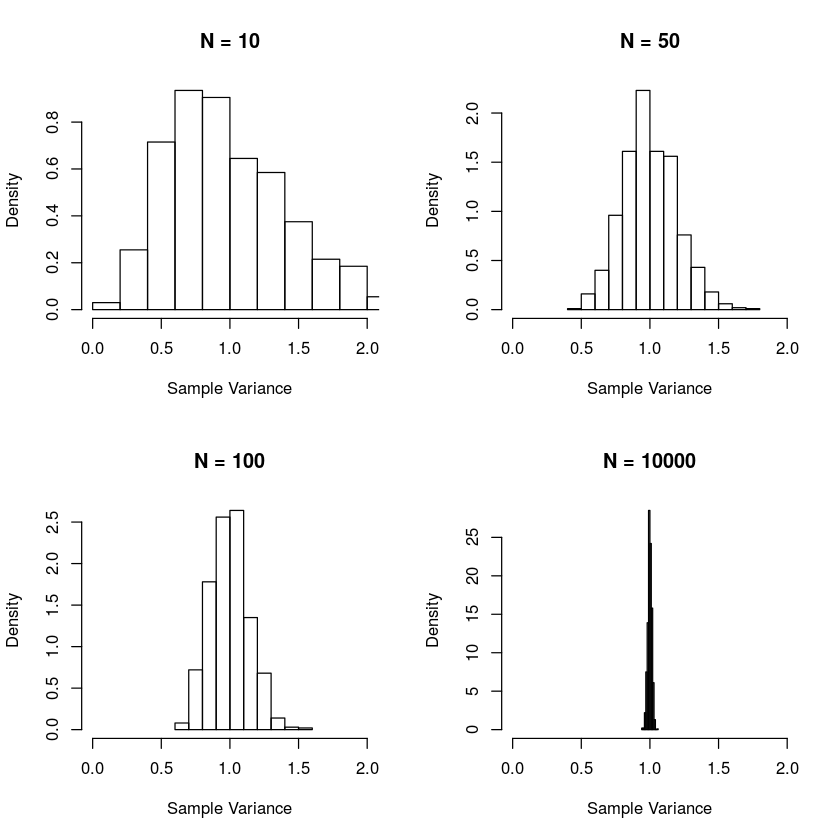

In [5]:
nsim = 1000 # number of simulations
Ns = c(10, 50, 100, 10000) # sample sizes

par(mfrow=c(2, 2))
for (N in Ns) {
    
    vars = c()
    
    for (s in 1:nsim) {
        sample = rnorm(N, mean=0, sd=1)
        vars = c(vars, var(sample))
    }
    
    hist(vars, freq=FALSE, main=paste("N =", N),
    xlab="Sample Variance", xlim=c(0, 2))
}

##### Note on Proving Consistency in this Course
We just showed two of the most powerful theorems for the first half of this course. THEY ARE ESSENTIAL! Why? Almost (maybe all of them) every estimator you see in this course will be a sample mean or a function of sample means for some random variable(s). So keep this in mind when you are asked to prove consistency!

#### Efficiency
Another concept which we will delay going into detail, is efficiency. It essentially is about finding estimators with smaller variances.

## Mean and Variance (Multivariate Case)
As a brief aside. A lot of what we have just done also holds for random vectors. Consider the random vector $X=(X_1,X_2)'$ of length 2. For example, $X_1$ could be wages and $X_2$ hours worked. Then

$$
E[X] = 
\begin{pmatrix}
E[X_1] \\ E[X_2]
\end{pmatrix}
$$

and a little more tricky, 

$$
Var[X] = E[(X - E[X])'(X - E[X])] = E[X'X - X'E[X] - E[X]'X + E[X]'E[X]]
$$

$$
= E[X'X] - E[X]'E[X] = 
E\left[
\begin{pmatrix}
X_1 & X_2
\end{pmatrix}
\begin{pmatrix}
X_1 \\ X_2
\end{pmatrix}
- 
\begin{pmatrix}
E[X_1] & E[X_2]
\end{pmatrix}
\begin{pmatrix}
E[X_1] \\ E[X_2]
\end{pmatrix}
\right]
$$
$$
=
\begin{pmatrix}
E[X_1^2] - E[X_1]^2 & E[X_1X_2] - E[X_1]E[X_2] \\
E[X_2X_1] - E[X_2]E[X_1] & E[X_2^2] - E[X_2]^2
\end{pmatrix}
= 
\begin{pmatrix}
Var[X_1] & Cov[X_1,X_2] \\
Cov[X_1,X_2] & Var[X_2].
\end{pmatrix}
$$

so that $Var[X]$ is $2\times 2$, symmetric, variance matrix.

### Expectation of Function of Random Vector
Just like in the univariate case, we can obtain an expectation of a function of random variables. Consider the random variable $(X,Y)$. Consider the function $g(X,Y)$, also random (it is a function of a random vector).

- Discrete cas
$$
E[g(X,Y)] = \sum_{x,y}g(x,y)f_{X,Y}(x,y)
$$

- Continuous case
$$
E[g(X,Y)] = \int_{-\infty}^{\infty}\int_{-\infty}^{\infty}g(x,y)f_{X,Y}(x,y)dxdy
$$

- Example: $g(X,Y) = X + Y$

$$
E[X+Y] = \int_{-\infty}^{\infty}\int_{-\infty}^{\infty}(x + y)f_{X,Y}(x,y)dxdy
$$
$$
=\int_{-\infty}^{\infty}\int_{-\infty}^{\infty}xf_{X,Y}(x,y)dxdy + \int_{-\infty}^{\infty}\int_{-\infty}^{\infty}yf_{X,Y}(x,y)dxdy
$$
$$
=\int_{-\infty}^{\infty}x\left(\int_{-\infty}^{\infty}f_{X,Y}(x,y)dy\right)dx + \int_{-\infty}^{\infty}y\left(\int_{-\infty}^{\infty}f_{X,Y}(x,y)dx\right)dy 
$$
$$
=\int_{-\infty}^{\infty}xf_X(x)dx + \int_{-\infty}^{\infty}yf_Y(y)dy = E[X] + E[Y],
$$
which shows a very useful property of expectations (works regardless of whether we look at discrete or continuous random variables).


### Sample Mean and Variance (Multivariate Case)
Suppose we have a sample $(X_i)_{i=1}^N$. The sample estimator of $E[X]$ is just the vector of sample means and the sample estimator of $Var[X]$ is just the sample counterparts to its components. It turns out, if we define $\boldsymbol{X}$ to be a $N\times 2$ matrix containing $(X_{1,i}, X_{2,i})$ in the ith row, that our sample variance matrix can be computed as

$$
\hat{S}_{X,N} = \frac{1}{N}(\boldsymbol{X} - \bar{X}_N)'(\boldsymbol{X} - \bar{X}_N).
$$

where $\boldsymbol{X} - \bar{X}_N$ is the "demeaned" $N\times 2$ matrix.

## Summarizing the Relationships between Variables
This next topic is critical. Because most economic models describe relationships between variables, knowing how to describe and estimate the statistical relationship between variables is extremely important. First we will consider condition moments. Specifically, the conditional mean and variance.

### Conditional Expectation
We define the **conditional expectation**, conditional on a particular realization $X=x$, as

$$
E[Y|X=x] = \int_{-\infty}^{\infty}yf_{Y|X}(y,x)
$$
$$
= \int_{-\infty}^{\infty}y\frac{f_{Y,X}(y,x)}{f_X(x)}dy
$$

but it is sometimes written as $E[Y|X]$ and

$$
E[Y|X] = \int_{-\infty}^{\infty}yf_{Y|X}(y,X)
$$
$$
= \int_{-\infty}^{\infty}y\frac{f_{Y,X}(y,X)}{f_X(X)}dy.
$$

In the former case it is a value and in the latter it is a random variable. It describes the mean value of $Y$ when $X$ takes on a particular value. The plot below shows the conditional expectation of $Y$ for different realizations of $X$. Each line in red represents a slice in the joint distribution of $(X,Y)$. They are not quite the conditional pdf because we still need to divide by the marginal pdf of $X$.

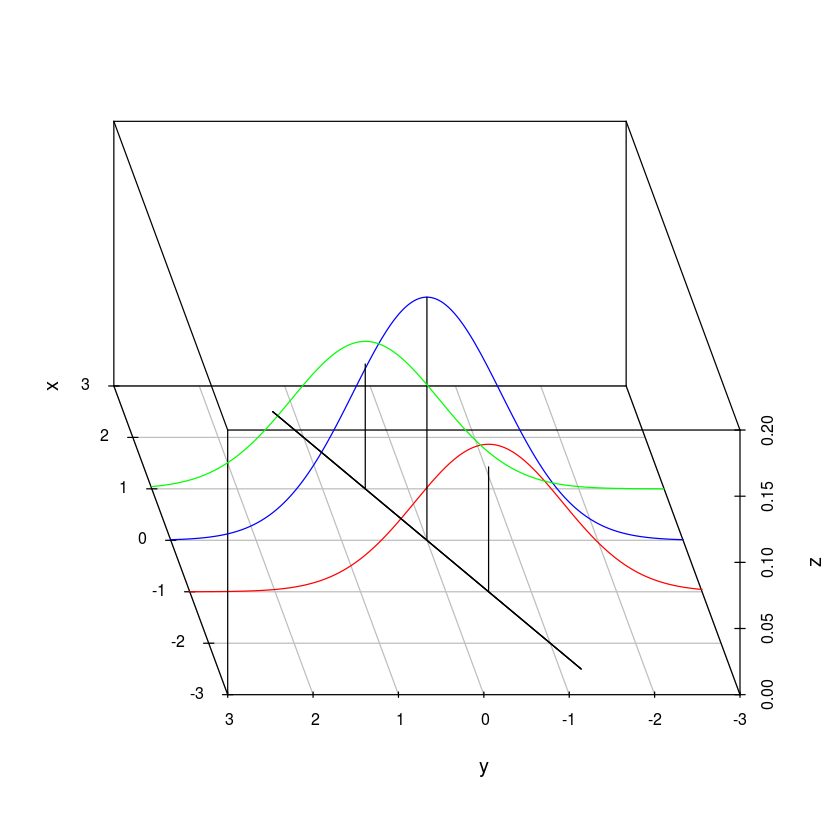

In [6]:
library(scatterplot3d)

x.vals = c(-1, 0, 1)
cols = c("red", "blue", "green")

for (i in 1:3) {
    y = seq(-3, 3, length.out=1000)
    x = rep(x.vals[i], 1000)
    z = dnorm(x.vals[i])*dnorm(y, mean=0.5*x.vals[i], sd=sqrt(0.75))
    
    if (i == 1){
        s3d <- scatterplot3d(x=x, y=y, z=z, type="l", ylim=c(-3, 3), xlim=c(-3, 3),
                 angle=-70, color=cols[i], zlim=c(0,0.15))
        s3d$points3d(x=rep(x.vals[i], 100), y=rep(0.5*x.vals[i], 100),
            z=seq(0, dnorm(x.vals[i])*dnorm(x.vals[i], mean=0.5*x.vals[i], sd=sqrt(0.75)), length.out=100),
            type="l")
    }
    else {
        s3d$points3d(x=x, y=y, z=z, type="l", ylim=c(-3, 3), xlim=c(-3, 3),
                 col=cols[i])
        s3d$points3d(x=rep(x.vals[i], 100), y=rep(0.5*x.vals[i], 100),
            z=seq(0, dnorm(x.vals[i])*dnorm(x.vals[i], mean=0.5*x.vals[i], sd=sqrt(0.75)), length.out=100),
            type="l")
    }
    s3d$points3d(x=seq(-2.5, 2.5, length.out=100), y=0.5*seq(-2.5, 2.5, length.out=100),
                z=rep(0, 100), type="l")
     
}

We can see that $E[Y|X=x]$ in the example above can be described by a linear function in the $y-x$ plane (as shown in dark black). Each point on the line is the conditional expectation of $Y$ for a particular $x$. 

In particular, this example shows the conditional expectation $E[Y|X=x]=0.5x$ for a bivariate normal distribution with $Cov[X,Y] = 0.5$ and $Var[X]=1$. The conditional expectation, when $(X,Y)$ are distributed as a bivariate normal is a straight line.

#### Estimator of Conditional Expectation
Suppose we have a sample $(X_i,Y_i)_{i=1}^N$. If $X$ were discrete, forming an estimator is easy. $E[Y|X=0]$ could be estimated by taking the sample mean of $Y$ for all observations $(X_i,Y_i)$ such that $X_i=0$. This just means we are taking the sample mean of the appropriate subpopulation, e.g., the mean wages of men. Or mathematically (and admittedly a much more complicated way of describing the estimator),

$$
\frac{1}{\sum_{i=1}^N\boldsymbol{1}\{X_i=0\}}\sum_{i=1}^NY_i\boldsymbol{1}\{X_i=0\}.
$$

In future lessons, we will provide much better ways to estimate the conditional expectation. How would you prove this is a consistent estimator of $E[Y|X=0]$? HINT: Divide both numerator and denominator by $N$. Then apply WLLN to both and then apply the CMT. Then use Law of Iterated Expecations on numerator.

### Conditional Variance

$$
Var[Y|X=x] = E[(Y-E[Y|X=x])^2] 
$$

$$
= \int_{-\infty}^{\infty}(y - E[Y|X=x])^2f_{Y|X}(x,y)dy
$$

$$
= E[Y^2|X=x] - E[Y|X=x]^2
$$

#### Estimator of Conditional Variance
Just like the conditional mean, if $X$ is discrete, we can just compute the sample variance of the appropriate subpopulation.

### Covariance
One way to summarize joint distributions is to look at conditional moments. Another way is to measure the dependence between variables. The covariance between $X$ and $Y$ is defined as follows:

$$
Cov[X,Y] = E[(X-E[X])(Y-E[Y])] = E[XY] - E[X]E[Y].
$$

so that the covariance answers the question: "when X is larger than its mean, does Y tend to be larger than its mean?" Large positive values mean the answer to this question is yes. Large negative values mean "when X is larger than its mean, Y tends to be below its mean". Values near 0 mean "knowing that X is above its mean doesn't tell us much whether Y is above or below its mean."
The covariance between $X$ and $Y$ is sometimes denoted as $\sigma_{XY}$. 

#### Sample Covariance
Consider a sample $(X_i,Y_i)_{i=1}^N$. The sample covariance is

$$
\frac{1}{N}\sum_{i=1}^N(X_i - \bar{X}_N)(Y_i - \bar{Y}_N)
$$

The following command in R will estimate the covariance.

In [7]:
X = c(1, 4, 3, 2, 4, 5, 6)
Y = c(3, 3, 3, 1, 2, 6, 7)

cov(X,Y)

[1] 2.785714

### Correlation
Correlation is defined as

$$
\frac{Cov[X,Y]}{\sqrt{Var[X]Var[Y]}}
$$

and is typically denoted by $\rho_{XY}$. The correlation is bounded between -1 (highest negative dependence) and 1 (highest positive dependence).

The following R code produces an estimate of the correlation.

In [8]:
cor(X,Y)

[1] 0.7543522

Compare that to...

In [9]:
cov(X,Y)/sqrt(var(X)*var(Y))

[1] 0.7543522

# Cheat Sheet for Expectations, Variance and Covariance
Here we will provide some nice properties of expectations, variances, and covariances and their conditional counterparts. Let $(X,Y,Z)$ be a random vector. Lower case letters will denote scalars.

1. $E[aX + b] = aE[X] + b$

2. $E[X + Y] = E[X] + E[Y]$

3. (Law of Iterated Expectations) $E[Y] = E_X[E_{Y|X=x}[Y]]$. Many times it is written excluding the explicit notation regarding with respect to which distributions one is taking expectations, i.e, $E[Y] = E[E[Y|X]]$ Why does it hold? Simply write it out and use what you know integration, the definition of conditional densities and how to obtain the marginal distribution from the joint distribution.
$$
E_X[E_{Y|X=x}[Y]]  = \int_{-\infty}^{\infty}E_{Y|X=x}[Y]f_X(x)dx
$$
$$
= \int_{-\infty}^{\infty}\left(\int_{-\infty}^{\infty}yf_{Y|X=x}(y,x)dy\right)f_X(x)dx
$$
$$ 
= \int_{-\infty}^{\infty}\left(\int_{-\infty}^{\infty}y\frac{f_{Y,X}(x,y)}{f_{X}(x)}dy\right)f_X(x)dx, \quad \text{apply definition of conditional pdf}
$$
$$ 
= \int_{-\infty}^{\infty}\int_{-\infty}^{\infty}yf_{Y,X}(x,y)dxdy, \quad \text{swap order of integration}
$$
$$ 
= \int_{-\infty}^{\infty}f_Y(y)dy, \quad \text{obtain marginal of Y}
$$
$$ 
= E[Y]
$$

4. Independence $f_{Y,X}(y,x) = f_{Y}(y)f_{X}(x)$ implies mean independence $E[Y|X]=E[Y]$ implies zero covariance or orthogonality $Cov[X,Y]=0$ (but the converse of each statement is NOT TRUE)

5. $E[\boldsymbol{1}\{X\in A\}] = P(X\in A)$

6. $E[aY + b|X] = aE[Y|X] + b$

7. $E[Y + Z|X] = E[Y|X] + E[Z|X]$

8. $E_{Z|X}[E_{Y|X,Z}[Y]] = E[Y|X]$ or sometimes written $E[E[Y|Z,X]] = E[Y|X]$, just another version of the Law of Iterated Expecations

9. $E[f(X)Y|X] = f(X)E[Y|X]$ for some function $f(X)$

10. (Jensen's inequality) $f(E[X])\leq E[f(X)]$ for a convex function $f(X)$

11. (Markov Inequality) $P(|X|>\epsilon)\leq\frac{E[|X|^q}{\epsilon^q}$ for all $q>0$ and $\epsilon>0$.

12. (Cauchy-Schwartz Inequality) $E[UV]^2\leq E[U^2]E[V^2]$

13. $Var[X+Y] = Var[X] + Var[Y] + 2Cov[X,Y]$

14. $Var[aX + b] = a^2Var[X]$

15. $Cov[aX + b, cY + d] = acCov[X,Y]$

16. $Cov[X,Y]=Cov[Y,X]$

17. $Cov[X + Y, Z] = Cov[X,Z] + Cov[Y,Z]$

18. If $X$ and $Y$ are independent, then $E[XY]=E[X]E[Y]$.

19. Consider a function of a random variable $g(X)$. The expectation of this function is
$$
E[g(X)] = \int_{-\infty}^{\infty}g(x)f_X(x)dx
$$